In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
covid=pd.read_csv("Daily_Cases_By_Province.csv")
covid.columns.values

array(['Date', 'AJK', 'Balochistan', 'KPK', 'GB', 'Sindh', 'Punjab',
       'ICT'], dtype=object)

In [6]:
covid_AJK=covid[['Date','AJK']]
covid_AJK=covid_AJK.rename(columns={'Date':'ds','AJK':'y'})

In [7]:
covid_AJK['y']=covid_AJK['y'].diff()
covid_AJK['y']=covid_AJK['y'].fillna(0)

In [9]:
model=Prophet()
model.fit(covid_AJK)
month = model.make_future_dataframe(periods=30)
forecast_month = model.predict(month)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khana\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



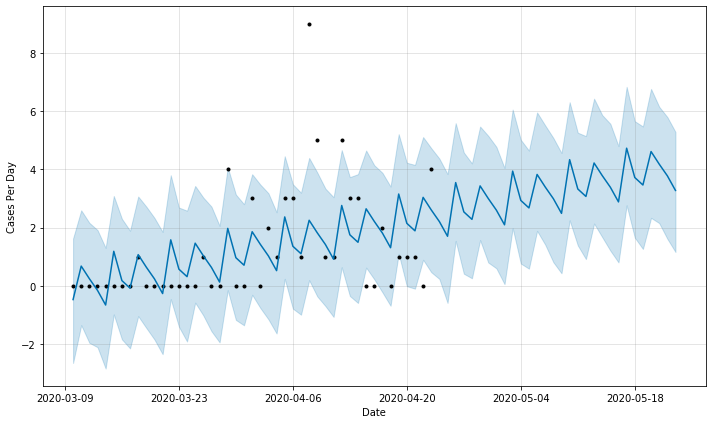

In [10]:
month_figure=model.plot(forecast_month,xlabel='Date',ylabel='Cases Per Day')